In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1.0 Examine Data types for each variable

#read the d1 dataset
df = pd.read_csv('D1.csv')

#show all columns information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 37 columns):
encounter_id                51766 non-null int64
patient_nbr                 51766 non-null int64
race                        51766 non-null object
gender                      51766 non-null object
age                         51766 non-null object
weight                      51766 non-null object
admission_type_id           51766 non-null int64
discharge_disposition_id    51766 non-null int64
admission_source_id         51766 non-null int64
time_in_hospital            51766 non-null int64
payer_code                  51766 non-null object
medical_specialty           51766 non-null object
num_lab_procedures          51766 non-null int64
num_procedures              51766 non-null int64
num_medications             51766 non-null int64
number_outpatient           51766 non-null int64
number_emergency            51766 non-null int64
number_inpatient            51766 non-null int64
dia

In [3]:
#1.0 Correct the data-types
def d1_prep():
    #read the d1 dataset
    d1 = pd.read_csv('d1.csv')
    
    #Variable data type casting
    #Change admission_type_id from interval/int to nominal/str
    d1['admission_type_id'] = d1['admission_type_id'].astype(str)
    
    #Change discharge_disposition_id from interval/int to nominal/str
    d1['discharge_disposition_id'] = d1['discharge_disposition_id'].astype(str)
    
    #Change admission_source_id from interval/int to nominal/str
    d1['admission_source_id'] = d1['admission_source_id'].astype(str)
    
    #Change 'change' to binary 0/1 variable
    change_map = {'change':0, 'no change': 1}
    d1['change'] = d1['change'].map(change_map)

    #Change diabetesMed to binary 0/1 variable
    diabetesMed_map = {'yes':0, 'no': 1}
    d1['diabetesMed'] = d1['diabetesMed'].map(diabetesMed_map)
    
    return d1

#from d1_tools import d1_prep

In [4]:
#Return dataset with updated variable types.
d1 = d1_prep()

In [60]:
#2.1 Identify skewness in variables

#Select for numeric data
d2 = d1.select_dtypes(include=[np.number])

print(d1.skew(axis = 0, skipna = True))
print(d2.skew(axis = 0, skipna = True))

encounter_id                 0.828531
patient_nbr                  0.609771
admission_type_id            1.855348
discharge_disposition_id     3.237941
admission_source_id          0.155033
time_in_hospital             1.197872
num_lab_procedures          -0.342571
num_procedures               1.385591
num_medications              1.189992
number_outpatient            7.794017
number_emergency            21.279724
number_inpatient             3.494846
number_diagnoses            -1.303386
change                            NaN
diabetesMed                       NaN
dtype: float64
encounter_id           0.828531
patient_nbr            0.609771
time_in_hospital       1.197872
num_lab_procedures    -0.342571
num_procedures         1.385591
num_medications        1.189992
number_outpatient      7.794017
number_emergency      21.279724
number_inpatient       3.494846
number_diagnoses      -1.303386
change                      NaN
diabetesMed                 NaN
dtype: float64


In [6]:
#2.2 Inconsistencies in the data
print("Unique values: \n",d1['race'].unique(), "\nCount: \n", d1['race'].value_counts())
print("\n")
print("Unique values: \n",d1['gender'].unique(), "\nCount: \n", d1['gender'].value_counts())
print("\n")
print("Unique values: \n",d1['age'].unique(), "\nCount: \n", d1['age'].value_counts())
print("\n")
print("Unique values: \n",d1['weight'].unique(), "\nCount: \n", d1['weight'].value_counts())
print("\n")
print("Unique values: \n",d1['payer_code'].unique(), "\nCount: \n", d1['payer_code'].value_counts())
print("\n")
print("Unique values: \n",d1['medical_specialty'].unique(), "\nCount: \n", d1['medical_specialty'].value_counts())
print("\n")
print("Unique values: \n",d1['chlorpropamide'].unique(), "\nCount: \n", d1['chlorpropamide'].value_counts())
print("\n")

Unique values: 
 ['Caucasian' 'AfricanAmerican' 'Hispanic' '?' 'Other' 'Asian'] 
Count: 
 Caucasian          40388
AfricanAmerican     8070
Hispanic            1018
?                   1016
Other                896
Asian                378
Name: race, dtype: int64


Unique values: 
 ['Female' 'Male' 'Unknown/Invalid'] 
Count: 
 Female             27718
Male               24044
Unknown/Invalid        4
Name: gender, dtype: int64


Unique values: 
 ['[60-70)' '[80-90)' '[70-80)' '[40-50)' '[50-60)' '[90-100)' '[30-40)'
 '[20-30)' '[10-20)' '[0-10)' '?'] 
Count: 
 [70-80)     12972
[60-70)     11618
[80-90)      9671
[50-60)      8482
[40-50)      4619
[30-40)      1717
[90-100)     1616
[20-30)       815
[10-20)       223
[0-10)         23
?              10
Name: age, dtype: int64


Unique values: 
 ['?' '[100-125)' '[50-75)' '[75-100)' '[0-25)' '[125-150)' '[25-50)'
 '[150-175)' '[175-200)' '>200'] 
Count: 
 ?            50431
[75-100)       542
[50-75)        347
[100-125)      309
[12

In [7]:
#2.3.a

#Define whether 'readmitted' is <30 days
is_within30 = d1['readmitted']=='<30'

#Filter out for values only containing readmission within 30 days
within30 = d1[is_within30]

#Female patient average time stay after readmission within 30 days.
print('The average stay for patientsafter readmission within 30 days grouped by ', within30.groupby(['gender'])['time_in_hospital'].mean())

The average stay for patientsafter readmission within 30 days grouped by  gender
Female    4.524752
Male      4.482972
Name: time_in_hospital, dtype: float64


In [8]:
#2.3.b 

#Group by age for readmissions from only within 30 days and print the group with the highest frequency
print('The highest risk age group is: ', within30.groupby(['age'])['readmitted'].value_counts().idxmax())

The highest risk age group is:  ('[70-80)', '<30')


In [9]:
#2.3.c

#Create a new column binary for readmissions
d1['readmission'] = np.where(d1['readmitted'] != 'NO', 'yes', 'no')

#group by readmission + age, value counts over 3000. 
print(d1.groupby(['readmission'])['age'].value_counts().loc[lambda x : x>3000])


readmission  age    
no           [70-80)    6770
             [60-70)    6270
             [80-90)    4930
             [50-60)    4789
yes          [70-80)    6202
             [60-70)    5348
             [80-90)    4741
             [50-60)    3693
Name: age, dtype: int64


In [10]:
#2.3.d

print(d1.groupby(['readmission'])['race'].value_counts())

# !! Do we drop the "?" from the dataframe?? There is a large number of rows containing it in this variable. 


readmission  race           
no           Caucasian          21268
             AfricanAmerican     4540
             Hispanic             674
             ?                    649
             Other                549
             Asian                258
yes          Caucasian          19120
             AfricanAmerican     3530
             ?                    367
             Other                347
             Hispanic             344
             Asian                120
Name: race, dtype: int64


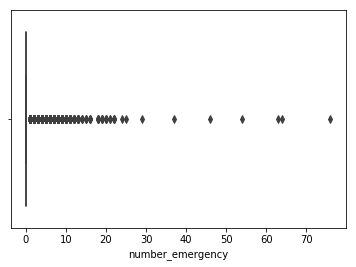

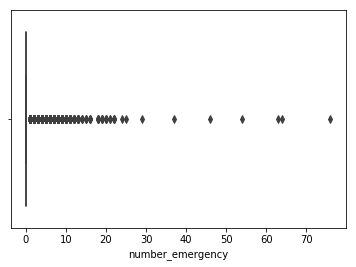

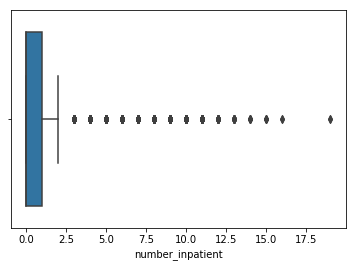

In [11]:
#3.1
#ignore future warnings
import warnings
warnings.filterwarnings("ignore")

op = sns.boxplot(d1['number_emergency'])
plt.show()

em = sns.boxplot(d1['number_emergency'])
plt.show()

ip = sns.boxplot(d1['number_inpatient'])
plt.show()

Get the average number of medications grouped by patients readmission
readmitted
<30    17.493944
>30    17.117712
NO     16.334562
Name: num_medications, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
The average number of medications is close between each group


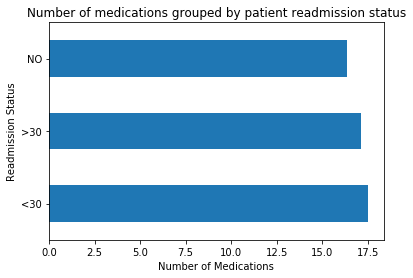

In [54]:
#3.2 relationship between num_medications and readmitted. 

print("Get the average number of medications grouped by patients readmission")
print(d1.groupby(['readmitted'])['num_medications'].mean())
print(d1.groupby(['readmitted'])['num_medications'].mean().plot(kind='barh'))
plt.title("Number of medications grouped by patient readmission status")
plt.xlabel("Number of Medications")
plt.ylabel("Readmission Status")
print ("The average number of medications is close between each group")

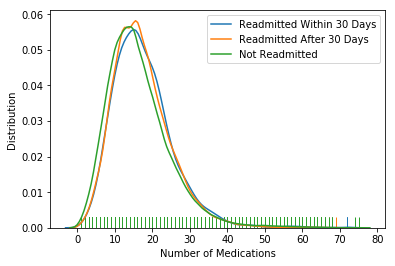

In [56]:
#3.2 probably remove this, just shows again in a distplot that there is not much difference between the number of medications and readmission status.
lessthan30 = d1.loc[d1['readmitted'] == '<30']
morethan30 = d1.loc[d1['readmitted'] == '>30']
none = d1.loc[d1['readmitted'] == 'NO']

sns.distplot(lessthan30[['num_medications']], label='Readmitted Within 30 Days', hist=False, rug=True)
sns.distplot(morethan30[['num_medications']], label='Readmitted After 30 Days',hist=False, rug=True)
sns.distplot(none[['num_medications']], label='Not Readmitted',hist=False, rug=True)

plt.legend()
plt.xlabel("Number of Medications")
plt.ylabel("Distribution")
plt.show()

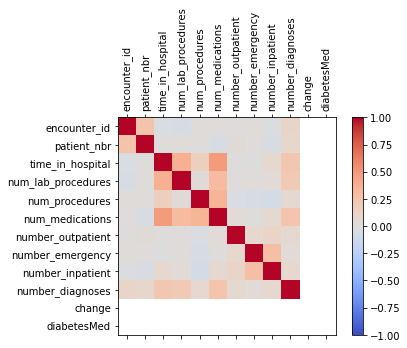

In [61]:
#3.3
corr = d2.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(d2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_yticklabels(d2.columns)
ax.set_xticklabels(d2.columns)
plt.show()
